In [ ]:
TASK-3:Car Price Prediction with Machine Learning

Author: M.Abhishek

Domain: Data Science

ID:OIB/J1/IP1227

Aim= The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [30]:
df= pd.read_csv('Car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [36]:
df.shape

(301, 9)

In [38]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [40]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [44]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [68]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [70]:

print("Dimensions of the dataset are: ",df.shape)
print("Size of advertisement dataset are: ",df.size)


Dimensions of the dataset are:  (301, 9)
Size of advertisement dataset are:  2709


<Figure size 900x900 with 0 Axes>

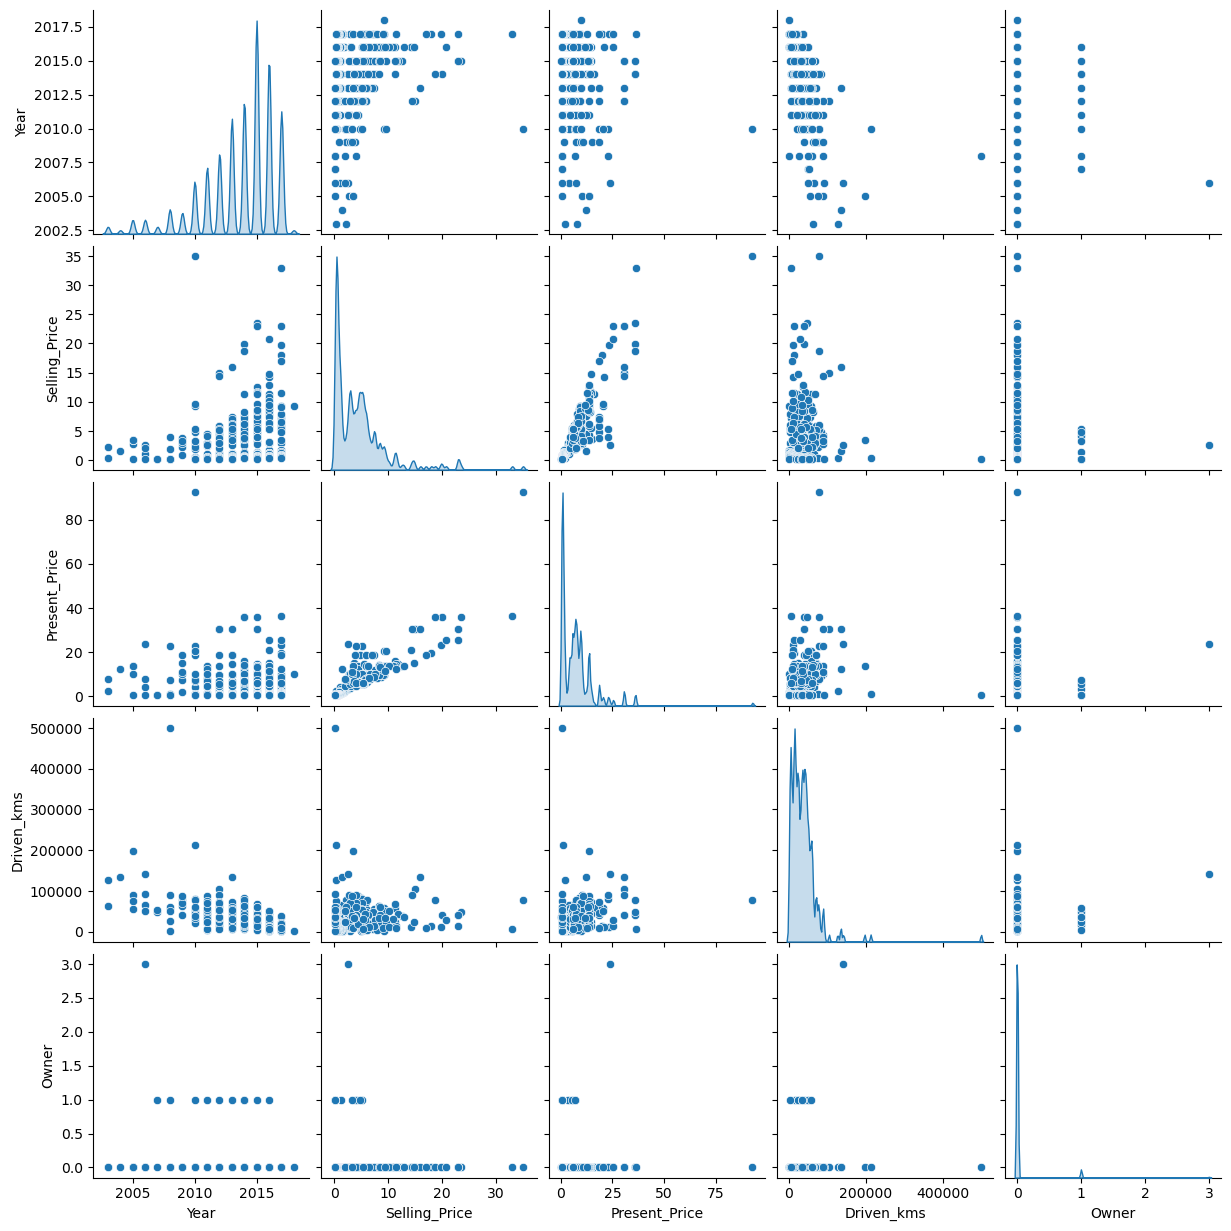

In [74]:
plt.figure(figsize=(9,9))
sns.pairplot(df,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

In [76]:

y=df.Selling_Price
x=df.drop(["Selling_Price","Car_Name"],axis=1)
print("Dataset after removing columns : \n",x)

Dataset after removing columns : 
      Year  Present_Price  Driven_kms Fuel_Type Selling_type Transmission  \
0    2014           5.59       27000    Petrol       Dealer       Manual   
1    2013           9.54       43000    Diesel       Dealer       Manual   
2    2017           9.85        6900    Petrol       Dealer       Manual   
3    2011           4.15        5200    Petrol       Dealer       Manual   
4    2014           6.87       42450    Diesel       Dealer       Manual   
..    ...            ...         ...       ...          ...          ...   
296  2016          11.60       33988    Diesel       Dealer       Manual   
297  2015           5.90       60000    Petrol       Dealer       Manual   
298  2009          11.00       87934    Petrol       Dealer       Manual   
299  2017          12.50        9000    Diesel       Dealer       Manual   
300  2016           5.90        5464    Petrol       Dealer       Manual   

     Owner  
0        0  
1        0  
2        0  
